In [2]:
# Import necessary libraries
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer


In [3]:

# Download NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Error loading punkt: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>
[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>
[nltk_data] Error loading wordnet: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


False

In [4]:
df = pd.read_csv('movies.csv')


In [5]:
df.head(5)

,id,title,year,rating
0,872906,Jawan,2023.0,7.3
1,554600,Uri: The Surgical Strike,2019.0,7.2
2,781732,Animal,2023.0,7.4
3,975533,The Archies,2023.0,7.1
4,734253,Adipurush,2023.0,5.3


In [6]:
def categorize_rating(rating):
    if rating > 7:
        return 'Good'
    elif 4.5 <= rating <= 6.9:
        return 'Neutral'
    else:
        return 'Bad'

# Apply the function to the 'rating' column to create a new 'rating_category' column
df['rating_category'] = df['rating'].apply(categorize_rating)


In [7]:
df.head(5)

,id,title,year,rating,rating_category
0,872906,Jawan,2023.0,7.3,Good
1,554600,Uri: The Surgical Strike,2019.0,7.2,Good
2,781732,Animal,2023.0,7.4,Good
3,975533,The Archies,2023.0,7.1,Good
4,734253,Adipurush,2023.0,5.3,Neutral


In [8]:
def preprocess_text(text):
    # Tokenization
    tokens = word_tokenize(str(text).lower())
    
    # Remove stopwords and non-alphabetic tokens
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token.isalpha() and token not in stop_words]
    
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    
    return ' '.join(tokens)

# Apply text preprocessing to the 'title' column (adjust if needed for another column)
df['processed_text'] = df['title'].apply(preprocess_text)


In [9]:
print(df[['id', 'title', 'processed_text']])

          id                     title       processed_text
0     872906                     Jawan                jawan
1     554600  Uri: The Surgical Strike  uri surgical strike
2     781732                    Animal               animal
3     975533               The Archies              archies
4     734253                 Adipurush            adipurush
...      ...                       ...                  ...
7414   72079          Little Terrorist     little terrorist
7415   55820           Chhuppa Chhuppi      chhuppa chhuppi
7416   54098                   Soch Lo              soch lo
7417   46402        Kisse Pyaar Karoon   kisse pyaar karoon
7418   21757                      Toss                 toss

[7419 rows x 3 columns]


C:\Users\Pulkit\AppData\Local\Temp\ipykernel_17412\1079663255.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='rating_category', data=df, palette='viridis')


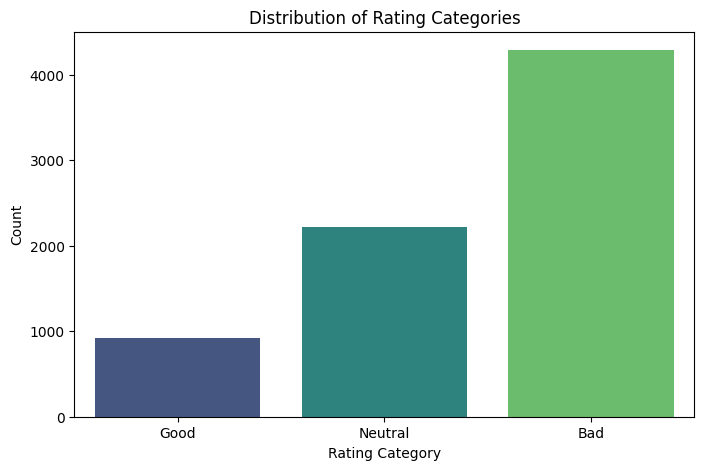

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the distribution of the 'rating_category' column
plt.figure(figsize=(8, 5))
sns.countplot(x='rating_category', data=df, palette='viridis')
plt.title('Distribution of Rating Categories')
plt.xlabel('Rating Category')
plt.ylabel('Count')
plt.show()


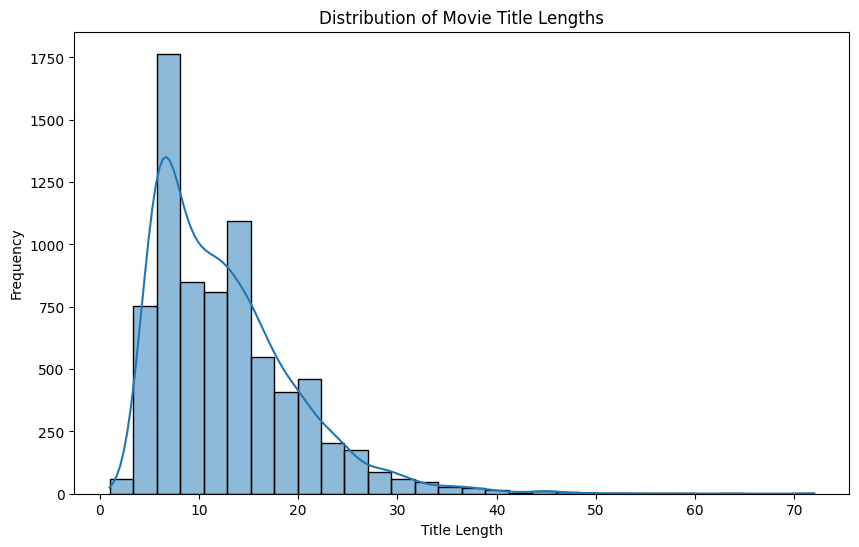

In [25]:
# Add a column for the length of the movie titles
df['title_length'] = df['title'].apply(len)

# Plot the distribution of title lengths
plt.figure(figsize=(10, 6))
sns.histplot(df['title_length'], bins=30, kde=True)
plt.title('Distribution of Movie Title Lengths')
plt.xlabel('Title Length')
plt.ylabel('Frequency')
plt.show()


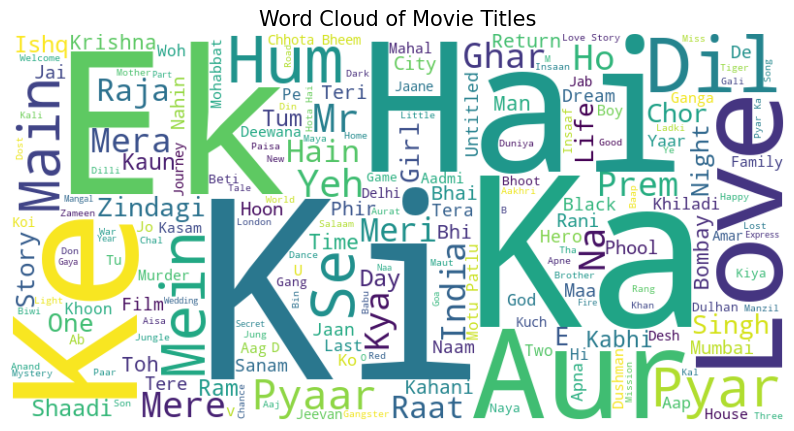

In [26]:
# Import necessary libraries
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Join all the movie titles into a single string
text = ' '.join(df['title'].dropna())  # Adjust the column name if necessary

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide axes
plt.title('Word Cloud of Movie Titles', fontsize=15)
plt.show()


In [10]:

# Feature extraction: TF-IDF for the movie title and adding the 'ratings' as a feature
vectorizer = TfidfVectorizer(max_features=1000)
X_title = vectorizer.fit_transform(df['processed_text'])

# Adding 'ratings' as a numerical feature to the dataset
import numpy as np
X_ratings = np.array(df['rating']).reshape(-1, 1)

# Combine TF-IDF features and ratings (concatenating the matrices)
from scipy.sparse import hstack
X = hstack([X_title, X_ratings])

# Labels (rating category)
y = df['rating_category']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
# Train the model (Logistic Regression)
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Print classification report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

         Bad       0.99      0.92      0.95       856
        Good       1.00      0.95      0.98       176
     Neutral       0.85      0.97      0.91       452

    accuracy                           0.94      1484
   macro avg       0.95      0.95      0.95      1484
weighted avg       0.95      0.94      0.94      1484



C:\Users\Pulkit\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [12]:
# Function to predict the rating category for a movie using the movie title
def predict_rating_category_from_dataset(title, df):
    # Check if the movie title exists in the dataset
    movie_data = df[df['title'].str.contains(title, case=False, na=False)]
    
    # If movie is found in the dataset
    if not movie_data.empty:
        # Extract the rating from the dataset and convert it to a numeric value
        rating = pd.to_numeric(movie_data.iloc[0]['rating'], errors='coerce')  # Convert to numeric
        
        # If rating is not NaN (i.e., valid rating value)
        if not pd.isna(rating):
            # Predict the category based on the rating
            if rating >= 7:
                return "Good"
            elif 5 <= rating < 7:
                return "Neutral"
            else:
                return "Bad"
        else:
            return "Invalid rating data"
    else:
        return "Movie not found in dataset"

In [17]:
# Test prediction for a new movie (only providing the title)
test_title = "google"  # Movie name
predicted_category = predict_rating_category_from_dataset(test_title, df)

# Display the result
print(f"Predicted category for '{test_title}': {predicted_category}")

Predicted category for 'google': Movie not found in dataset


In [14]:
import pickle

# Save the model using pickle
with open('sentiment_model.pkl', 'wb') as file:
    pickle.dump(model, file)
